In [139]:
pwd

'/Users/ki/Desktop/capstone_projectData/CorruptVBM_Rejection_Factors/Khamanna'

In [140]:
cd C:\Users\Aidan\Documents\VBM_OPRA_Data\vbm_data

[Errno 2] No such file or directory: 'C:UsersAidanDocumentsVBM_OPRA_Datavbm_data'
/Users/ki/Desktop/capstone_projectData/CorruptVBM_Rejection_Factors/Khamanna


In [141]:
import pandas as pd
pd.set_option("display.max_columns", None) 

In [142]:
raw_df = pd.read_csv('../../vbm12.13.20.csv', low_memory=False)

In [143]:
raw_df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
0,Atlantic,Absecon City,01,1.0,Single Election,P2763351335,LINGELBACH,CAROLYN,R,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/23/2020,11/20/2020,Accepted,Drop Box,NaN,122,E Faunce Landing Rd,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,NaN,NaN
1,Atlantic,Absecon City,01,1.0,Annual Mail-In Elections,P3919851339,TIMMS,BRIAN,D,NaN,Democratic,Active,Presidential / Removed Resident,Atlantic,Absecon City,01,1,Democratic,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,US,08/26/2020,08/26/2020,Accepted,09/21/2020,10/21/2020,11/20/2020,Accepted,Drop Box,NaN,506,Lazy Ln,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,8609447558,BIBLIOMANE74@GMAIL.COM,NaN
2,Atlantic,Absecon City,01,1.0,Single Election,P6095651352,CUSHLANIS,ROBIN,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/18/2020,11/20/2020,Accepted,Drop Box,NaN,645,Weilers Ln,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,6093284677,NaN,NaN
3,Atlantic,Absecon City,01,1.0,Single Election,A1425851358,DILLHOFF,KEVIN,T,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,635,4th St,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,KEVINDILLHOFF@GMAIL.COM,NaN
4,Atlantic,Absecon City,01,1.0,Single Election,A1783751359,JETER,PAUL,D,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,US,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,511,LAZY LN,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044852,Warren,White Township,00,6.0,Single Election,L1061243339,COWLEY,JARED,DUANE,Jr.,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,US,08/14/2020,10/19/2020,Accepted,10/21/2020,11/03/2020,11/23/2020,Accepted,In Person,NaN,96,BUCKHORN DR,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,NaN,NaN,NaN
6044853,Warren,White Township,00,6.0,Single Election,C2754450078,WELENOFSKY,LISA,JEAN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/28/2020,11/23/2020,Accepted,Drop Box,NaN,25,COLBY CT,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044854,Warren,White Township,00,6.0,Single Election,H4507252594,MCGINLEY,MEGHAN,NaN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/27/2020,11/23/2020,Accepted,Drop Box,NaN,23,COLBY CT,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044855,Warren,White Township,00,6.0,Single Election,N4444001342,CARMEN,KOI,LEA,NaN,Unaffiliated,Active,Regular,Warre

In [144]:
#Removing duplicates


df = raw_df.drop_duplicates(subset=['voter_id'], keep='last')

In [145]:
df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
0,Atlantic,Absecon City,01,1.0,Single Election,P2763351335,LINGELBACH,CAROLYN,R,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/23/2020,11/20/2020,Accepted,Drop Box,NaN,122,E Faunce Landing Rd,122 E Faunce Landing Rd,NaN,NaN,Absecon,NJ,08201-1808,NaN,NaN,NaN
1,Atlantic,Absecon City,01,1.0,Annual Mail-In Elections,P3919851339,TIMMS,BRIAN,D,NaN,Democratic,Active,Presidential / Removed Resident,Atlantic,Absecon City,01,1,Democratic,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,US,08/26/2020,08/26/2020,Accepted,09/21/2020,10/21/2020,11/20/2020,Accepted,Drop Box,NaN,506,Lazy Ln,506 Lazy Ln,NaN,NaN,Absecon,NJ,08201-1337,8609447558,BIBLIOMANE74@GMAIL.COM,NaN
2,Atlantic,Absecon City,01,1.0,Single Election,P6095651352,CUSHLANIS,ROBIN,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/18/2020,11/20/2020,Accepted,Drop Box,NaN,645,Weilers Ln,645 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1326,6093284677,NaN,NaN
3,Atlantic,Absecon City,01,1.0,Single Election,A1425851358,DILLHOFF,KEVIN,T,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,635,4th St,635 4th St,NaN,NaN,Absecon,NJ,08201-1304,NaN,KEVINDILLHOFF@GMAIL.COM,NaN
4,Atlantic,Absecon City,01,1.0,Single Election,A1783751359,JETER,PAUL,D,NaN,Democratic,Active,Regular,Atlantic,Absecon City,01,1,Democratic,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,US,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,11/20/2020,Accepted,Drop Box,NaN,511,LAZY LN,511 LAZY LN,NaN,NaN,ABSECON,NJ,08201-1338,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044852,Warren,White Township,00,6.0,Single Election,L1061243339,COWLEY,JARED,DUANE,Jr.,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,US,08/14/2020,10/19/2020,Accepted,10/21/2020,11/03/2020,11/23/2020,Accepted,In Person,NaN,96,BUCKHORN DR,96 BUCKHORN DR,NaN,NaN,WASHINGTON,NJ,07882-3805,NaN,NaN,NaN
6044853,Warren,White Township,00,6.0,Single Election,C2754450078,WELENOFSKY,LISA,JEAN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/28/2020,11/23/2020,Accepted,Drop Box,NaN,25,COLBY CT,25 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044854,Warren,White Township,00,6.0,Single Election,H4507252594,MCGINLEY,MEGHAN,NaN,NaN,Unaffiliated,Active,Regular,Warren,White Township,00,6,Unaffiliated,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,US,08/14/2020,10/19/2020,Accepted,10/21/2020,10/27/2020,11/23/2020,Accepted,Drop Box,NaN,23,COLBY CT,23 COLBY CT,NaN,NaN,BELVIDERE,NJ,07823-2755,NaN,NaN,NaN
6044855,Warren,White Township,00,6.0,Single Election,N4444001342,CARMEN,KOI,LEA,NaN,Unaffiliated,Active,Regular,Warre

In [146]:
# NA's in Rejection reason *should* represent accepted ballots AND people who did not vote

df['received_rejReason'].isna().sum()

5977797

In [147]:
df['ballot_status'].value_counts()

Accepted    3982740
Received     335064
Rejected      50532
Name: ballot_status, dtype: int64

In [148]:
# Something isn't right here. Why are we getting more results for *reasons* the ballot was rejected...
# than the number of ballots actually *listed* as rejected??

# Maybe some ballots have two rejection reasons? But if that were the case, shouldn't we still have only wound up
# with of them when we eliminated duplicate rows?

# Maybe some ballots that were initially rejected were later "cured" by the voter...
# and therefore status = accepted, even though rejection reason is still there?
# No way to test this specific hypothesis since there's no direct info on cured ballots in dataset.

# Less specific version: some ballots likely have a rejection reason...
# but are still listed as "received" or even "accepted."

In [149]:
# Let's test out that last idea.

# First, filter the df to only include ballots with a rejection reason.

test_df = df.dropna(subset=['received_rejReason'])
test_df

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
105,Atlantic,Absecon City,01,1.0,Single Election,D2726451787,FROMM,DIANA,D,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Democratic,533 N Shore Rd,NaN,NaN,Absecon,NJ,08201-1821,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,NaN,2020-11-19,Rejected,Drop Box,Signature Does Not Match,533,N Shore Rd,533 N Shore Rd,NaN,NaN,Absecon,NJ,08201-1821,NaN,NaN,NaN
345,Atlantic,Absecon City,01,1.0,Single Election,E2481651808,MORGAN,JAMES,A,NaN,Republican,Active,Regular,Atlantic,Absecon City,01,1,Republican,45 Shady Ln,NaN,NaN,Absecon,NJ,08201-1723,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Mail,Ballot Received After Deadline,45,Shady Ln,45 Shady Ln,NaN,NaN,Absecon,NJ,08201-1723,NaN,NaN,NaN
379,Atlantic,Absecon City,01,1.0,Single Election,E3249551811,MAISANO-MAY,JAMIE,L,NaN,Libertarian,Active,Regular,Atlantic,Absecon City,01,1,Libertarian,312 Spruce St,NaN,NaN,Absecon,NJ,08201-1726,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,11/12/2020,2020-11-12,Rejected,Mail,Ballot Received After Deadline,312,Spruce St,312 Spruce St,NaN,NaN,Absecon,NJ,08201-1726,NaN,NaN,NaN
477,Atlantic,Galloway Township,00,8.0,Single Election,F0365451823,GUENTHER,CHARLES,JOSEPH,Jr.,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Republican,640 Weilers Ln,NaN,NaN,Absecon,NJ,08201-1327,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/27/2020,2020-11-19,Rejected,Drop Box,Signature Does Not Match,718,RAVENWOOD DR,718 RAVENWOOD DR,NaN,NaN,GALLOWAY,NJ,08205-3116,6096468812,NaN,NaN
568,Atlantic,Absecon City,01,1.0,Single Election,B0672452839,MACKENZIE,STEPHEN,E,NaN,Unaffiliated,Active,Regular,Atlantic,Absecon City,01,1,Unaffiliated,243 E Wyoming Ave,NaN,NaN,Absecon,NJ,08201-1709,NaN,08/14/2020,08/31/2020,Accepted,09/21/2020,10/28/2020,2020-11-19,Rejected,Drop Box,Signature Does Not Match,243,E Wyoming Ave,243 E Wyoming Ave,NaN,NaN,Absecon,NJ,08201-1709,6096464232,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044452,Warren,White Township,00,6.0,Single Election,A6060952460,LUCAS,LEOKADIA,NaN,NaN,Republican,Active,Regular,Warren,White Township,00,6,Republican,86 Summerfield Rd,NaN,NaN,Belvidere,NJ,07823-2713,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/17/2020,2020-11-19,Rejected,In Person,Certificate Not Signed,86,Summerfield Rd,86 Summerfield Rd,NaN,NaN,Belvidere,NJ,07823-2713,NaN,NaN,NaN
6044566,Warren,White Township,00,6.0,Single Election,B1654652468,SHAH,RAJSHREE,S,NaN,Democratic,Active,Regular,Warren,White Township,00,6,Democratic,44 Colby Ct,NaN,NaN,Belvidere,NJ,07823-2756,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,10/07/2020,2020-11-19,Rejected,Mail,Certificate Missing,44,Colby Ct,44 Colby Ct,NaN,NaN,Belvidere,NJ,07823-2756,NaN,NaN,NaN
6044581,Warren,White Township,00,6.0,Single Election,B1874552469,MARIANI,DAVID,M,NaN,Republican,Active,Regular,Warren,White Township,00,6,Unaffiliated,60 Castners Rd,NaN,NaN,Belvidere,NJ,07823-2802,NaN,08/14/2020,08/31/2020,Accepted,09/28/2020,11/05/2020,2020-11-19,Rejected,Drop Box,Certificate Missing,60,Castners Rd,60 Castners Rd,NaN,NaN,Belvidere,NJ,07823-280

In [150]:
# Next, does status = "accepted"?
# is_accepted is a boolean variable with True or False in it
is_accepted =  test_df['ballot_status']=='Accepted'
print(is_accepted.head())

105    False
345    False
379    False
477    False
568    False
Name: ballot_status, dtype: bool


In [151]:
# now, filter the df to include only ballots with a rejection reason but still listed as accepted

rejected_accepted = test_df[is_accepted]
print(rejected_accepted.shape)

(155, 45)


In [152]:
# looks like there are 153 instances where there's a rejection reason but still accepted
rejected_accepted

,current_county,current_municipality,current_ward,current_district,ballot_requestType,voter_id,voter_lastName,voter_firstName,voter_middleName,voter_suffix,voter_party,voter_status,ballot_type,ballot_county,ballot_municipality,ballot_ward,ballot_district,ballot_vtr_party,ballot_addr_address1,ballot_addr_address2,ballot_addr_address3,ballot_addr_city,ballot_addr_state,ballot_addr_zipcode,ballot_addr_country,application_receivedDate,application_processedDate,application_status,ballot_mailedDate,ballot_receivedDate,ballot_countedDate,ballot_status,received_type,received_rejReason,voter_resAddr_num,voter_resAddr_street,voter_resAddr_address1,voter_resAddr_address2,voter_resAddr_address3,voter_resAddr_city,voter_resAddr_state,voter_resAddr_zipcode,voter_phone,voter_email,received_bearer
1149010,Camden,Audubon Borough,00,3.0,Annual Mail-In Elections,A4936552084,MARTORANO,THERESA,S,NaN,Democratic,Active,Presidential / Removed Resident,Camden,Audubon Borough,00,3,Democratic,540 W MERCHANT ST,NaN,NaN,AUDUBON,NJ,08106-1910,US,12/22/2019,12/22/2019,Accepted,09/29/2020,10/20/2020,11/20/2020,Accepted,Drop Box,Certificate Not Signed,540,W MERCHANT ST,540 W MERCHANT ST,NaN,NaN,AUDUBON,NJ,08106-1910,NaN,NaN,NaN
1157612,Camden,Barrington Borough,00,3.0,Single Election,B6363753982,GABRIEL,LAUREN,A,NaN,Democratic,Active,Regular,Camden,Barrington Borough,00,3,Democratic,18 Page Ave,NaN,NaN,Barrington,NJ,08007-1122,NaN,08/14/2020,08/31/2020,Accepted,09/29/2020,10/15/2020,11/20/2020,Accepted,Mail,Signature Does Not Match,18,Page Ave,18 Page Ave,NaN,NaN,Barrington,NJ,08007-1122,NaN,NaN,NaN
1158316,Camden,Barrington Borough,00,4.0,Single Election,B1113352093,HOWARD,RICHARD,NaN,NaN,Democratic,Active,Regular,Camden,Barrington Borough,00,4,Democratic,4404 Reamer Dr,NaN,NaN,Barrington,NJ,08007-1724,NaN,08/14/2020,08/31/2020,Accepted,09/29/2020,10/14/2020,11/20/2020,Accepted,Mail,Certificate Not Signed,4404,Reamer Dr,4404 Reamer Dr,NaN,NaN,Barrington,NJ,08007-1724,NaN,NaN,NaN
1184123,Camden,Camden City,01,6.0,Single Election,J1612453773,MORALES,CARLOS,J,NaN,Democratic,Active,Regular,Camden,Camden City,01,6,Democratic,1132 W AMERICA RD,NaN,NaN,CAMDEN,NJ,08104-2807,US,08/14/2020,08/31/2020,Accepted,09/28/2020,10/16/2020,11/20/2020,Accepted,Drop Box,Certificate Not Signed,1132,W AMERICA RD,1132 W AMERICA RD,NaN,NaN,CAMDEN,NJ,08104-2807,NaN,NaN,NaN
1235489,Camden,Cherry Hill Township,00,15.0,Single Election,F5090236288,MIZELL,GEORGE,DAVID,NaN,Unaffiliated,Active,Regular,Camden,Cherry Hill Township,00,15,Unaffiliated,1 SILVERTOP LN,NaN,NaN,CHERRY HILL,NJ,08002-1538,US,10/15/2020,10/15/2020,Accepted,10/16/2020,10/21/2020,11/20/2020,Accepted,Drop Box,Signature Does Not Match,1,SILVERTOP LN,1 SILVERTOP LN,NaN,NaN,CHERRY HILL,NJ,08002-1538,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5590310,Sussex,Sparta Township,00,8.0,Single Election,D6205054025,MCNAMARA,GLEN,P,NaN,Unaffiliated,Active,Regular,Sussex,Sparta Township,00,8,Unaffiliated,30 S Shore Trl,NaN,NaN,Sparta,NJ,07871-1611,NaN,08/14/2020,08/31/2020,Accepted,09/15/2020,11/05/2020,11/23/2020,Accepted,Drop Box,Signature Does Not Match,30,S Shore Trl,30 S Shore Trl,NaN,NaN,Sparta,NJ,07871-1611,NaN,NaN,NaN
5670712,Union,Elizabeth City,01,2.0,Single Election,I0711753748,ROJAS,JESUS,A,NaN,Unaffiliated,Active,Regular,Union,Elizabeth City,01,2,Unaffiliated,112 Broadway,NaN,NaN,Elizabeth,NJ,07206-1856,NaN,08/14/2020,08/31/2020,Accepted,09/17/2020,10/29/2020,11/20/2020,Accepted,Bearer,Signature Does Not Match,112,Broadway,112 Broadway,NaN,NaN,Elizabeth,NJ,07206-1856,NaN,NaN,ANDREW ROJAS
5670849,Union,Elizabeth City,01,2.0,Annual Mail-In Elections,A1905253939,ROJAS,JESUS,A,NaN,Unaffiliated,Active,Presidential / Removed Resident,Union,Elizabeth City,01,2,Unaffiliated,112 BROADWAY,NaN,NaN,ELIZABETH,NJ,07206,UNITED STATES,12/22/2019,12/22/2019,Accepted,09/17/2020,10/29/2020,

In [153]:
# My best GUESS is that these are "cured" ballots -- ballots that were initially rejected, but...
# the voter was able to resolve whatever the issue was and get their vote counted

In [154]:
# Now let's check if any ballots have a rejection reason but status = "received" still.

# Does status = "received"?
# is_received is a boolean variable with True or False in it
is_received =  test_df['ballot_status']=='Received'
print(is_received.head())

105    False
345    False
379    False
477    False
568    False
Name: ballot_status, dtype: bool


In [155]:
# now, filter the df to include only ballots with a rejection reason but still listed as received

rejected_received = test_df[is_received]
print(rejected_received.shape)

(0, 45)


In [156]:
# Only two, thankfully.

# So, while this can't be demonstrated in the dataset itself, it seems likely...
# that the cause of the discrepancy is ballots that were initially rejected, then cured later on.

In [157]:
#Let's whittle this down to only the cols we want to keep

small_df = df[['voter_id', 'ballot_county', 'ballot_vtr_party', 'ballot_receivedDate', 'ballot_status', 'received_rejReason']]

In [158]:
small_df

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN
6044855,N4444001342,Warren,Unaffiliated,11/04/2020,Accepted,NaN


In [159]:
# Wait -- why do we seem to have some ballots that were accepted but have no received date?

# Lets's filter our df to only rows that have a ballot status, and check how many have no received date.

test_df2 = small_df.dropna(subset=['ballot_status'])
test_df2

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [160]:
# Now check how many rows have no received date:

test_df2['ballot_receivedDate'].isna().sum()

123446

In [161]:
# that's... a lot.

# Let's do it in the opposite order now. How many have received date but no ballot status?

test_df3 = small_df.dropna(subset=['ballot_receivedDate'])
test_df3

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
5,A4660351369,Atlantic,Unaffiliated,10/21/2020,Accepted,NaN
6,K0876551578,Atlantic,Unaffiliated,10/28/2020,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [162]:
test_df3['ballot_status'].isna().sum()

1

In [163]:
# that, thankfully, is much much smaller.

# not sure why so many seemingly-returned ballots have no received date...
# but that's beyond the scope of our project right now.

In [164]:
# Let's finally fliter this down to only people who at least attempted to return their ballots.
# It seems like the best assumption we can make to do this is that NA's in ballot status = didn't vote.

In [165]:
clean_VBM = small_df.dropna(subset=['ballot_status'])
clean_VBM

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [166]:
#... suggesting 4,370,478 people at least tried to vote (regardless of whether ballot was rejected)

In [167]:
# Let's write this to csv

clean_VBM.to_csv('clean_VBM.csv', index=False) 

In [168]:
# Now let's create another dataframe grouped by county

grouped_VBM = clean_VBM.groupby(['ballot_county'])


In [169]:
votes_cast = grouped_VBM.size()
votes_cast

ballot_county
Atlantic      135484
Bergen        476733
Burlington    253339
Camden        246440
Cape May       56565
Cumberland     60047
Essex         307537
Gloucester    170985
Hudson        224243
Hunterdon      84247
Mercer        169955
Middlesex     355993
Monmouth      377148
Morris        293123
Ocean         338676
Passaic       210776
Salem          33022
Somerset      183143
Sussex         87304
Union         243523
Warren         60053
dtype: int64

In [170]:
# note : these numbers do not all match with official turnout results.
#  (example: Warren county)

# Not much that can be done about that at this point until...
#  we hear back from KnowInk about our assumptions while cleaning.

In [171]:
# Let's go ahead and calculate ballot status by county.

In [172]:
number_rejected = grouped_VBM['ballot_status'].apply(lambda x: x.str.contains('Rejected').sum())
number_rejected

ballot_county
Atlantic       910
Bergen        5986
Burlington    1911
Camden         703
Cape May       367
Cumberland     761
Essex         2184
Gloucester     100
Hudson        5605
Hunterdon      618
Mercer        1314
Middlesex     6837
Monmouth      5403
Morris        1122
Ocean         3727
Passaic       1797
Salem          572
Somerset      2369
Sussex         992
Union         6284
Warren         970
Name: ballot_status, dtype: int64

In [173]:
county_df = pd.concat([votes_cast, number_rejected], axis = 'columns', sort=False)

In [174]:
county_df

,0,ballot_status
ballot_county,,
Atlantic,135484,910
Bergen,476733,5986
Burlington,253339,1911
Camden,246440,703
Cape May,56565,367
Cumberland,60047,761
Essex,307537,2184
Gloucester,170985,100
Hudson,224243,5605


In [175]:
county_df.rename(columns={0:'ballots_cast', 'ballot_status':'ballots_rejected'}, inplace=True)

In [176]:
county_df

,ballots_cast,ballots_rejected
ballot_county,,
Atlantic,135484,910
Bergen,476733,5986
Burlington,253339,1911
Camden,246440,703
Cape May,56565,367
Cumberland,60047,761
Essex,307537,2184
Gloucester,170985,100
Hudson,224243,5605


In [177]:
county_df['percent_rejected'] = ((county_df['ballots_rejected']/county_df['ballots_cast']) * 100).round(2)

In [178]:
county_df = county_df.reset_index().sort_values(by='percent_rejected')

In [179]:
#in the meantime, write to csv

In [180]:

county_df

,ballot_county,ballots_cast,ballots_rejected,percent_rejected
7,Gloucester,170985,100,0.06
3,Camden,246440,703,0.29
13,Morris,293123,1122,0.38
4,Cape May,56565,367,0.65
0,Atlantic,135484,910,0.67
6,Essex,307537,2184,0.71
9,Hunterdon,84247,618,0.73
2,Burlington,253339,1911,0.75
10,Mercer,169955,1314,0.77
15,Passaic,210776,1797,0.85


In [181]:
county_df.to_csv('county_df.csv', index=False)

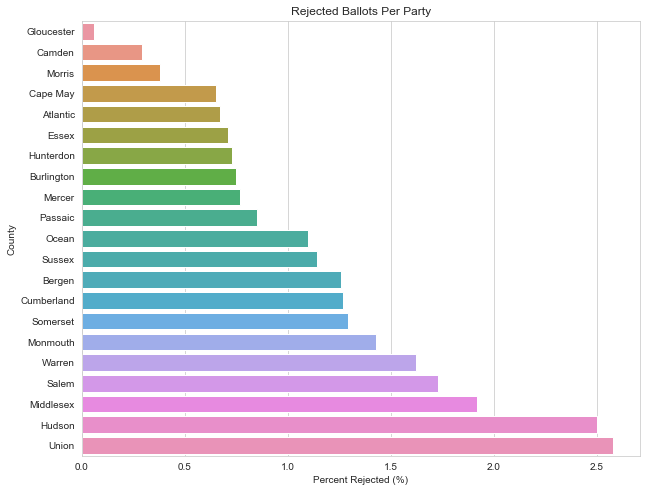

In [182]:
#graphing the rejection rates per Counties
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y='ballot_county', x='percent_rejected', data=county_df, ax = ax)
plot_var = ax.set(ylabel='County', xlabel='Percent Rejected (%)', title="Rejected Ballots Per County")

In [183]:
clean_VBM

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
6044851,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
6044852,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
6044853,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
6044854,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [184]:
#Calculating the number of rejections per party and per county
party_df=pd.DataFrame(clean_VBM.groupby(['ballot_county','ballot_vtr_party','received_rejReason'])\
                      ['voter_id'].size()).reset_index()

party_df.columns = ['ballot_county','ballot_vtr_party','rejReason','rejCount']
party_county=pd.DataFrame(party_df.groupby(['ballot_county','ballot_vtr_party'])['rejCount']\
                           .sum().sort_values(ascending=False)).reset_index()

#Checking for missing values
party_county.isna().sum()

ballot_county       0
ballot_vtr_party    0
rejCount            0
dtype: int64

In [185]:
#Combining the smaller parties under "Other"
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
party_county.ballot_vtr_party = party_county.ballot_vtr_party.apply(lambda x: 'Other' if x in Other else x)
party_county=pd.DataFrame(party_county.groupby(['ballot_county','ballot_vtr_party'])['rejCount'].sum().reset_index())

#Pivoting to get the increment count per party - Democratic, Republican, Other, Unaffiliated
party_county=party_county.pivot(index='ballot_county', columns='ballot_vtr_party', values='rejCount').reset_index()

In [186]:
party_county.to_csv('party_county.csv', index=False) 
party_county = pd.read_csv('party_county.csv', low_memory=False)
party_county

,ballot_county,Democratic,Other,Republican,Unaffiliated
0,Atlantic,280.0,32.0,178.0,420.0
1,Bergen,2118.0,111.0,1272.0,2485.0
2,Burlington,673.0,32.0,389.0,817.0
3,Camden,309.0,5.0,81.0,328.0
4,Cape May,59.0,4.0,141.0,164.0
5,Cumberland,241.0,19.0,141.0,361.0
6,Essex,1115.0,23.0,188.0,858.0
7,Gloucester,35.0,NaN,26.0,39.0
8,Hudson,3033.0,142.0,628.0,1802.0
9,Hunterdon,99.0,12.0,232.0,277.0


In [187]:
party_county.columns

Index(['ballot_county', 'Democratic', 'Other', 'Republican', 'Unaffiliated'], dtype='object')

In [188]:
#Calculating Total Rejections per party and per county

party_ballot=pd.DataFrame(clean_VBM.groupby(['ballot_county','ballot_vtr_party'])\
                      ['voter_id'].size()).reset_index()

party_ballot.columns = ['ballot_county','ballot_vtr_party','totalBallots']
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
party_ballot.ballot_vtr_party = party_ballot.ballot_vtr_party.apply(lambda x: 'Other' if x in Other else x)

In [189]:
#Total Ballots received by each party in a given county
party_ballot=pd.DataFrame(party_ballot.groupby(['ballot_county','ballot_vtr_party'])['totalBallots'].sum().reset_index())
party_ballot=party_ballot.pivot(index='ballot_county', columns='ballot_vtr_party', values='totalBallots').reset_index()
party_ballot

ballot_vtr_party,ballot_county,Democratic,Other,Republican,Unaffiliated
0,Atlantic,51716,1364,42689,39715
1,Bergen,195245,3483,112464,165541
2,Burlington,106989,2005,70171,74174
3,Camden,130291,2327,43641,70181
4,Cape May,14880,401,25648,15636
5,Cumberland,23799,800,16540,18908
6,Essex,176164,1860,36458,93055
7,Gloucester,71906,1588,44763,52728
8,Hudson,138818,2480,23369,59576
9,Hunterdon,24073,535,35006,24633


In [190]:
#Modifying the columns names for clarity (adding the word'total' to each column)
party_ballot.to_csv('party_ballot.csv', index=False) 
party_ballot = pd.read_csv('party_ballot.csv', low_memory=False)
party_ballot.columns = ['ballot_county', 'DemTotal','OtherTotal','RepubTotal','UnaffTotal']

In [191]:
#merging two datasets - #of rejections per county and per party merging with Total number of ballots per county and per party
merged_party = pd.merge(party_ballot, party_county, left_on = 'ballot_county', right_on= 'ballot_county', how='outer')

In [192]:
#Merged Dataset
merged_party

,ballot_county,DemTotal,OtherTotal,RepubTotal,UnaffTotal,Democratic,Other,Republican,Unaffiliated
0,Atlantic,51716,1364,42689,39715,280.0,32.0,178.0,420.0
1,Bergen,195245,3483,112464,165541,2118.0,111.0,1272.0,2485.0
2,Burlington,106989,2005,70171,74174,673.0,32.0,389.0,817.0
3,Camden,130291,2327,43641,70181,309.0,5.0,81.0,328.0
4,Cape May,14880,401,25648,15636,59.0,4.0,141.0,164.0
5,Cumberland,23799,800,16540,18908,241.0,19.0,141.0,361.0
6,Essex,176164,1860,36458,93055,1115.0,23.0,188.0,858.0
7,Gloucester,71906,1588,44763,52728,35.0,NaN,26.0,39.0
8,Hudson,138818,2480,23369,59576,3033.0,142.0,628.0,1802.0
9,Hunterdon,24073,535,35006,24633,99.0,12.0,232.0,277.0


In [193]:
#Calculating the percentages
merged_party['Dem_per_totalCountyDem%']=(merged_party['Democratic']/merged_party['DemTotal']*100).round(1)
merged_party['Repub_per_totalCountyRep%']=(merged_party['Republican']/merged_party['RepubTotal']*100).round(1)
merged_party['Other_per_totalCountyOther%']=(merged_party['Other']/merged_party['OtherTotal']*100).round(1)
merged_party['Unaff_per_totalCountyUnaff%']=(merged_party['Unaffiliated']/merged_party['UnaffTotal']*100).round(1)

In [194]:
#Fixing the missing numbers
merged_party=merged_party.fillna(0.0)
merged_party

,ballot_county,DemTotal,OtherTotal,RepubTotal,UnaffTotal,Democratic,Other,Republican,Unaffiliated,Dem_per_totalCountyDem%,Repub_per_totalCountyRep%,Other_per_totalCountyOther%,Unaff_per_totalCountyUnaff%
0,Atlantic,51716,1364,42689,39715,280.0,32.0,178.0,420.0,0.5,0.4,2.3,1.1
1,Bergen,195245,3483,112464,165541,2118.0,111.0,1272.0,2485.0,1.1,1.1,3.2,1.5
2,Burlington,106989,2005,70171,74174,673.0,32.0,389.0,817.0,0.6,0.6,1.6,1.1
3,Camden,130291,2327,43641,70181,309.0,5.0,81.0,328.0,0.2,0.2,0.2,0.5
4,Cape May,14880,401,25648,15636,59.0,4.0,141.0,164.0,0.4,0.5,1.0,1.0
5,Cumberland,23799,800,16540,18908,241.0,19.0,141.0,361.0,1.0,0.9,2.4,1.9
6,Essex,176164,1860,36458,93055,1115.0,23.0,188.0,858.0,0.6,0.5,1.2,0.9
7,Gloucester,71906,1588,44763,52728,35.0,0.0,26.0,39.0,0.0,0.1,0.0,0.1
8,Hudson,138818,2480,23369,59576,3033.0,142.0,628.0,1802.0,2.2,2.7,5.7,3.0
9,Hunterdon,24073,535,35006,24633,99.0,12.0,232.0,277.0,0.4,0.7,2.2,1.1


### Graphing total rejections per State



In [195]:
rejections=pd.DataFrame(clean_VBM.groupby(['received_rejReason'])['ballot_receivedDate'].size()).reset_index()
rejections.columns = ['received_rejReason', 'count']
rejections = rejections.sort_values(by='count')
rejections

,received_rejReason,count
5,Candidate Provided Assistance,2
12,One Envelope Unsealed,2
15,Primary-Voted Both Parties,3
2,Bearer Book Not Signed In,3
4,Both Envelopes Unsealed,5
10,Ineligible Voter Status,6
8,Incomplete Assistor Portion,54
14,Power of Attorney,60
11,Moved Out of County,198
9,Incomplete Bearer Portion,403


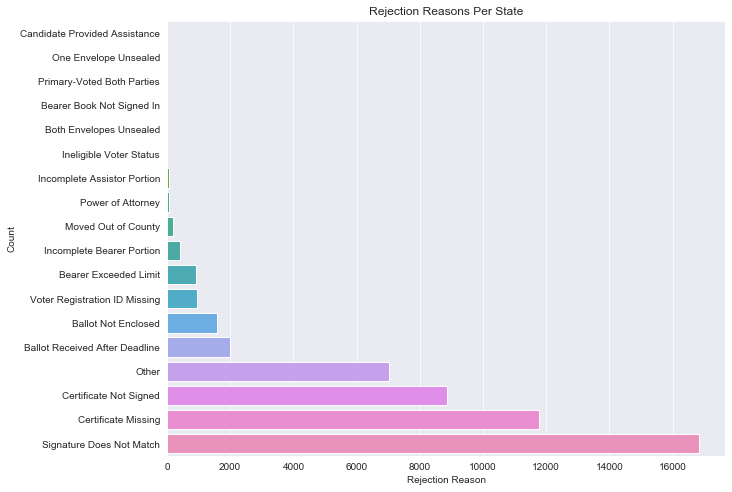

In [196]:

%matplotlib inline
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='count', y='received_rejReason', data=rejections, ax = ax)
plot_var = ax.set(ylabel='Count', xlabel='Rejection Reason', title="Rejection Reasons Per State")

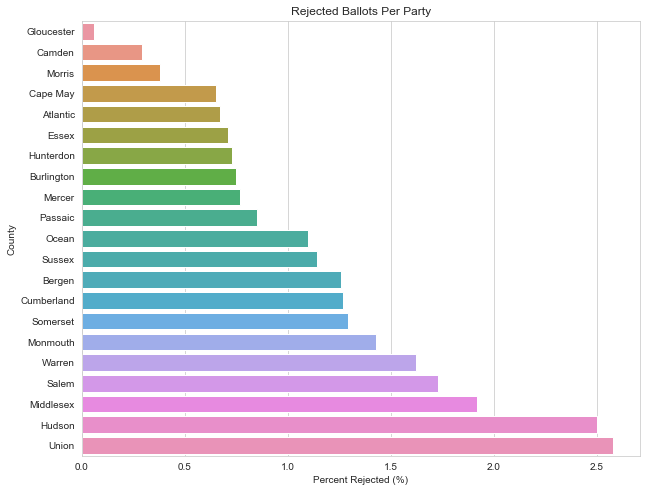

In [197]:
#graphing the rejection rates per Counties
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(y='ballot_county', x='percent_rejected', data=county_df, ax = ax)
plot_var = ax.set(ylabel='County', xlabel='Percent Rejected (%)', title="Rejected Ballots Per Party")

## Mapping Rejection Reasons On Each Party and County

In [198]:

reasons_per_county=clean_VBM[['ballot_county', 'ballot_vtr_party', 'received_rejReason','ballot_status']]
reasons_per_county.groupby(['ballot_county','ballot_vtr_party','received_rejReason'])['ballot_status'].count()


ballot_county  ballot_vtr_party    received_rejReason            
Atlantic       Conservative Party  Ballot Received After Deadline      3
                                   Signature Does Not Match            5
               Democratic          Ballot Received After Deadline     42
                                   Certificate Not Signed             20
                                   Other                               9
                                                                    ... 
Warren         Unaffiliated        Bearer Exceeded Limit               2
                                   Certificate Missing                94
                                   Certificate Not Signed             13
                                   Other                               1
                                   Signature Does Not Match          269
Name: ballot_status, Length: 809, dtype: int64

In [199]:
#Grouping 3rd parties into "Other"
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
reasons_per_county.ballot_vtr_party = reasons_per_county.ballot_vtr_party.apply(lambda x: 'Other' if x in Other else x)
reasons_per_county


/Users/ki/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ballot_county,ballot_vtr_party,received_rejReason,ballot_status
0,Atlantic,Unaffiliated,NaN,Accepted
1,Atlantic,Democratic,NaN,Accepted
2,Atlantic,Republican,NaN,Accepted
3,Atlantic,Democratic,NaN,Accepted
4,Atlantic,Democratic,NaN,Accepted
...,...,...,...,...
6044851,Warren,Unaffiliated,NaN,Accepted
6044852,Warren,Democratic,NaN,Accepted
6044853,Warren,Unaffiliated,NaN,Accepted
6044854,Warren,Unaffiliated,NaN,Accepted


In [200]:
#Grouping the reasons that are less than 5% in a combined column called "Grouped_together"
reasons_per_county.received_rejReason.unique()
Grouped_together = ['Ballot Not Enclosed',
       'Voter Registration ID Missing', 'Moved Out of County',
       'Bearer Exceeded Limit', 'Incomplete Bearer Portion',
       'Candidate Provided Assistance', 'One Envelope Unsealed',
       'Bearer Book Not Signed In', 'Ineligible Voter Status',
       'Both Envelopes Unsealed', 'Incomplete Assistor Portion',
       'Primary-Voted Both Parties', 'Power of Attorney']
reasons_per_county.received_rejReason = reasons_per_county.received_rejReason.apply(lambda x: 'Grouped_together' if x in Grouped_together else x)
reasons_per_county1=pd.DataFrame(reasons_per_county.groupby(['ballot_county','ballot_vtr_party','received_rejReason'])['ballot_status'].count().reset_index())
reasons_per_county1

,ballot_county,ballot_vtr_party,received_rejReason,ballot_status
0,Atlantic,Democratic,Ballot Received After Deadline,42
1,Atlantic,Democratic,Certificate Not Signed,20
2,Atlantic,Democratic,Grouped_together,1
3,Atlantic,Democratic,Other,9
4,Atlantic,Democratic,Signature Does Not Match,208
...,...,...,...,...
421,Warren,Unaffiliated,Certificate Missing,94
422,Warren,Unaffiliated,Certificate Not Signed,13
423,Warren,Unaffiliated,Grouped_together,2
424,Warren,Unaffiliated,Other,1


In [201]:
reasons_per_county1['reasons_per_party'] = reasons_per_county1.ballot_vtr_party + ' ' + reasons_per_county1.received_rejReason

reasons_per_county2=reasons_per_county1[['ballot_county','reasons_per_party','ballot_status']]
reasons_per_county2=reasons_per_county2.pivot(index='ballot_county', columns='reasons_per_party', values='ballot_status').reset_index()
reasons_per_county2=reasons_per_county2.fillna(0.0)
reasons_per_county2=reasons_per_county2.rename(columns = {'ballot_county':'county'})
#reasons_per_county2=reasons_per_county2.reset_index()
reasons_per_county2.to_csv('reasons_per_county.csv', index=False)


#### Adding an extra total column for each reason (again per party and county)

In [202]:
reasons_per_county2['Ballot Received After Deadline']=reasons_per_county2['Democratic Ballot Received After Deadline']+\
reasons_per_county2['Other Ballot Received After Deadline']+\
reasons_per_county2['Republican Ballot Received After Deadline']+\
reasons_per_county2['Unaffiliated Ballot Received After Deadline']

reasons_per_county2['Certificate Missing']=reasons_per_county2['Democratic Certificate Missing']+\
reasons_per_county2['Other Certificate Missing']+\
reasons_per_county2['Republican Certificate Missing']+\
reasons_per_county2['Unaffiliated Certificate Missing']


reasons_per_county2['Certificate Not Signed']=reasons_per_county2['Democratic Certificate Not Signed']+\
reasons_per_county2['Other Certificate Not Signed']+\
reasons_per_county2['Republican Certificate Not Signed']+\
reasons_per_county2['Unaffiliated Certificate Not Signed']

reasons_per_county2['Grouped together']=reasons_per_county2['Democratic Grouped_together']+\
reasons_per_county2['Republican Grouped_together']+\
reasons_per_county2['Other Grouped_together']+\
reasons_per_county2['Unaffiliated Grouped_together']

reasons_per_county2['Other Reasons']=reasons_per_county2['Democratic Other']+\
reasons_per_county2['Republican Other']+\
reasons_per_county2['Other Other']+\
reasons_per_county2['Unaffiliated Other']

reasons_per_county2['Signature Does Not Match']=reasons_per_county2['Democratic Signature Does Not Match']+\
reasons_per_county2['Republican Signature Does Not Match']+\
reasons_per_county2['Other Signature Does Not Match']+\
reasons_per_county2['Unaffiliated Signature Does Not Match']
reasons_per_county2=reasons_per_county2.reset_index()
reasons_per_county2.to_csv('reasons_per_county.csv', index=False)


In [203]:
reasons_per_county2

reasons_per_party,index,county,Democratic Ballot Received After Deadline,Democratic Certificate Missing,Democratic Certificate Not Signed,Democratic Grouped_together,Democratic Other,Democratic Signature Does Not Match,Other Ballot Received After Deadline,Other Certificate Missing,Other Certificate Not Signed,Other Grouped_together,Other Other,Other Signature Does Not Match,Republican Ballot Received After Deadline,Republican Certificate Missing,Republican Certificate Not Signed,Republican Grouped_together,Republican Other,Republican Signature Does Not Match,Unaffiliated Ballot Received After Deadline,Unaffiliated Certificate Missing,Unaffiliated Certificate Not Signed,Unaffiliated Grouped_together,Unaffiliated Other,Unaffiliated Signature Does Not Match,Ballot Received After Deadline,Certificate Missing,Certificate Not Signed,Grouped together,Other Reasons,Signature Does Not Match
0,0,Atlantic,42.0,0.0,20.0,1.0,9.0,208.0,4.0,0.0,1.0,0.0,0.0,27.0,27.0,0.0,11.0,3.0,7.0,130.0,62.0,0.0,26.0,1.0,17.0,314.0,135.0,0.0,58.0,5.0,33.0,679.0
1,1,Bergen,121.0,1328.0,168.0,126.0,92.0,283.0,6.0,71.0,9.0,3.0,8.0,14.0,55.0,836.0,84.0,87.0,61.0,149.0,179.0,1457.0,147.0,196.0,103.0,403.0,361.0,3692.0,408.0,412.0,264.0,849.0
2,2,Burlington,48.0,8.0,73.0,67.0,79.0,398.0,6.0,0.0,3.0,2.0,2.0,19.0,21.0,8.0,52.0,35.0,52.0,221.0,79.0,5.0,94.0,94.0,82.0,463.0,154.0,21.0,222.0,198.0,215.0,1101.0
3,3,Camden,0.0,0.0,84.0,157.0,1.0,67.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,0.0,18.0,45.0,0.0,18.0,0.0,0.0,58.0,203.0,0.0,67.0,0.0,0.0,162.0,407.0,1.0,153.0
4,4,Cape May,6.0,14.0,2.0,0.0,36.0,1.0,0.0,1.0,0.0,0.0,3.0,0.0,9.0,74.0,0.0,0.0,57.0,1.0,16.0,61.0,0.0,3.0,83.0,1.0,31.0,150.0,2.0,3.0,179.0,3.0
5,5,Cumberland,14.0,39.0,42.0,36.0,5.0,105.0,0.0,4.0,4.0,2.0,0.0,9.0,12.0,12.0,21.0,25.0,9.0,62.0,37.0,28.0,45.0,33.0,7.0,211.0,63.0,83.0,112.0,96.0,21.0,387.0
6,6,Essex,0.0,4.0,448.0,161.0,58.0,444.0,0.0,0.0,8.0,3.0,2.0,10.0,0.0,0.0,68.0,34.0,14.0,72.0,0.0,0.0,335.0,87.0,49.0,387.0,0.0,4.0,859.0,285.0,123.0,913.0
7,7,Gloucester,1.0,0.0,18.0,12.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,8.0,1.0,7.0,2.0,0.0,19.0,7.0,1.0,10.0,4.0,0.0,46.0,27.0,3.0,20.0
8,8,Hudson,159.0,1422.0,248.0,119.0,45.0,1040.0,8.0,51.0,15.0,4.0,1.0,63.0,27.0,301.0,35.0,17.0,8.0,240.0,168.0,698.0,106.0,50.0,23.0,757.0,362.0,2472.0,404.0,190.0,77.0,2100.0
9,9,Hunterdon,3.0,58.0,15.0,4.0,1.0,18.0,1.0,7.0,2.0,0.0,0.0,2.0,9.0,110.0,49.0,21.0,4.0,39.0,27.0,101.0,59.0,13.0,7.0,70.0,40.0,276.0,125.0,38.0,12.0,129.0


In [204]:
county_df3=county_df[['ballot_county','ballots_rejected']]
county_df3=county_df3.rename(columns = {'ballot_county':'county'})
reasons_per_county3=pd.merge(reasons_per_county2,county_df3, left_on='county',right_on='county',how='outer')
reasons_per_county3=reasons_per_county3.drop(['index'],axis=1)

In [205]:
reasons_per_county3['Ballot Received After Deadline(%)']=(reasons_per_county3['Ballot Received After Deadline']/reasons_per_county3['ballots_rejected']*100).round(2)
reasons_per_county3['Certificate Missing(%)']=(reasons_per_county3['Certificate Missing']/reasons_per_county3['ballots_rejected']*100).round(2)
reasons_per_county3['Certificate Not Signed(%)']=(reasons_per_county3['Certificate Not Signed']/reasons_per_county3['ballots_rejected']*100).round(2)
reasons_per_county3['Grouped together(%)']=(reasons_per_county3['Grouped together']/reasons_per_county3['ballots_rejected']*100).round(2)
reasons_per_county3[ 'Other Reasons(%)']=(reasons_per_county3[ 'Other Reasons']/reasons_per_county3['ballots_rejected']*100).round(2)
reasons_per_county3['Signature Does Not Match(%)']=(reasons_per_county3['Signature Does Not Match']/reasons_per_county3['ballots_rejected']*100).round(2)

In [206]:
# Writing the newer reasons file to csv (this one includes all reasons per party and per county plus 
# total numer of each reasons per each county and percentage of total number of each reason) 
reasons_per_county3=reasons_per_county3.rename(columns = {'ballots_rejected':'Total_Rejected_Ballots'})
reasons_per_county3.to_csv('reasons_per_county.csv', index=False)
reasons_per_county4 = reasons_per_county3[['county','Ballot Received After Deadline(%)', 'Certificate Missing(%)',
       'Certificate Not Signed(%)', 'Grouped together(%)', 'Other Reasons(%)',
       'Signature Does Not Match(%)']]
reasons_per_county4.columns

Index(['county', 'Ballot Received After Deadline(%)', 'Certificate Missing(%)',
       'Certificate Not Signed(%)', 'Grouped together(%)', 'Other Reasons(%)',
       'Signature Does Not Match(%)'],
      dtype='object')

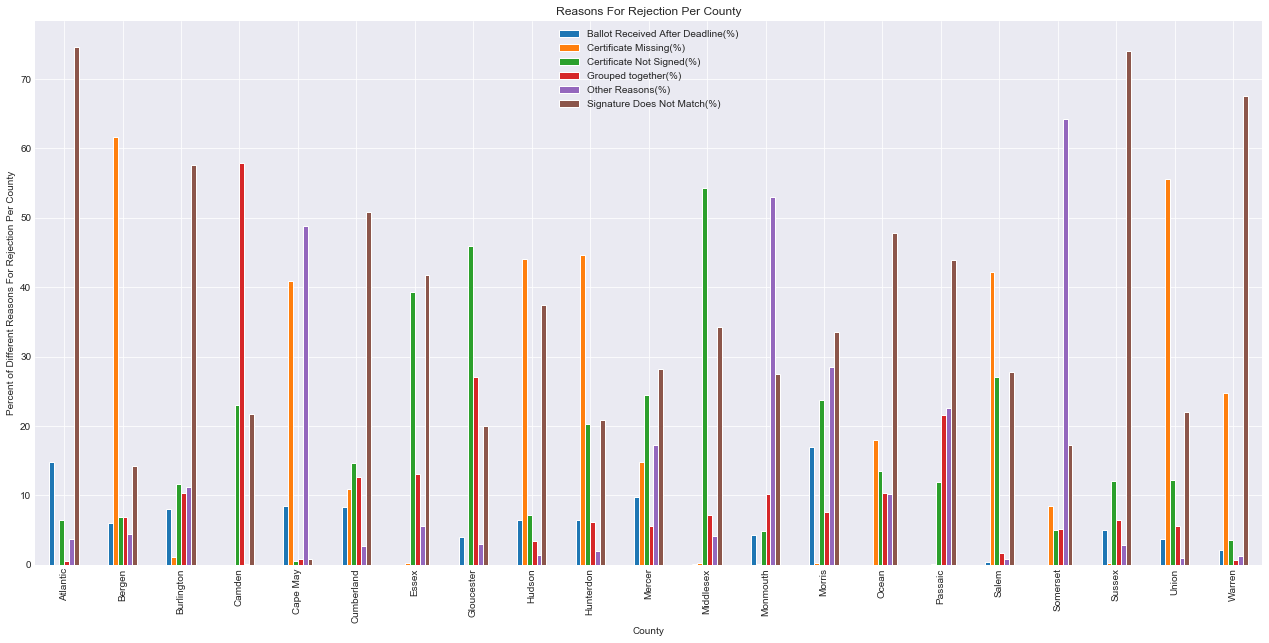

In [207]:
#Plotting the reasons per county
plotdata3 = reasons_per_county4
plt.style.use('seaborn-darkgrid')
plotdata3.plot(
  x="county", y=['Ballot Received After Deadline(%)', 'Certificate Missing(%)',
                 'Certificate Not Signed(%)', 'Grouped together(%)', 'Other Reasons(%)',
                 'Signature Does Not Match(%)'], kind="bar",figsize=(22,10))
plt.title("Reasons For Rejection Per County")
plt.xlabel("County")
plt.ylabel("Percent of Different Reasons For Rejection Per County")

plt.show()

### mergign six last columns of reasons per county with merged_df (demographics data)

In [208]:
merged_df1 = pd.read_csv('../Final Code/merged_df.csv', low_memory=False)

In [209]:
merged_df1=merged_df1.rename(columns = {'County':'county'})


In [210]:
merged_df2 = pd.merge(reasons_per_county4, merged_df1, left_on = 'county', right_on = 'county', how = 'outer')
merged_df2.to_csv('merged_df2.csv')

#### Plotting Rejections Rate Per Party and County

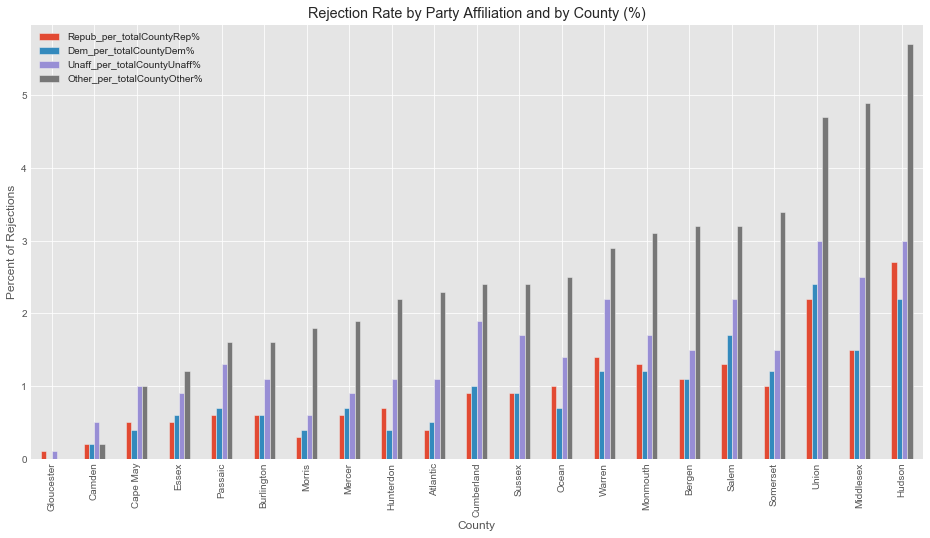

In [211]:
plotdata1 = merged_party[['ballot_county','Dem_per_totalCountyDem%', 'Repub_per_totalCountyRep%',
       'Other_per_totalCountyOther%', 'Unaff_per_totalCountyUnaff%']].sort_values(by='Other_per_totalCountyOther%')
plt.style.use('ggplot')
plotdata1.plot(
  x="ballot_county", y=['Repub_per_totalCountyRep%','Dem_per_totalCountyDem%','Unaff_per_totalCountyUnaff%','Other_per_totalCountyOther%'], kind="bar",figsize=(16,8))
plt.title("Rejection Rate by Party Affiliation and by County (%)")
plt.xlabel("County")
plt.ylabel("Percent of Rejections")

plt.show()


In [212]:
#Writing the "party dataset" to csv
merged_party.to_csv('merged_party.csv') 
merged_party

,ballot_county,DemTotal,OtherTotal,RepubTotal,UnaffTotal,Democratic,Other,Republican,Unaffiliated,Dem_per_totalCountyDem%,Repub_per_totalCountyRep%,Other_per_totalCountyOther%,Unaff_per_totalCountyUnaff%
0,Atlantic,51716,1364,42689,39715,280.0,32.0,178.0,420.0,0.5,0.4,2.3,1.1
1,Bergen,195245,3483,112464,165541,2118.0,111.0,1272.0,2485.0,1.1,1.1,3.2,1.5
2,Burlington,106989,2005,70171,74174,673.0,32.0,389.0,817.0,0.6,0.6,1.6,1.1
3,Camden,130291,2327,43641,70181,309.0,5.0,81.0,328.0,0.2,0.2,0.2,0.5
4,Cape May,14880,401,25648,15636,59.0,4.0,141.0,164.0,0.4,0.5,1.0,1.0
5,Cumberland,23799,800,16540,18908,241.0,19.0,141.0,361.0,1.0,0.9,2.4,1.9
6,Essex,176164,1860,36458,93055,1115.0,23.0,188.0,858.0,0.6,0.5,1.2,0.9
7,Gloucester,71906,1588,44763,52728,35.0,0.0,26.0,39.0,0.0,0.1,0.0,0.1
8,Hudson,138818,2480,23369,59576,3033.0,142.0,628.0,1802.0,2.2,2.7,5.7,3.0
9,Hunterdon,24073,535,35006,24633,99.0,12.0,232.0,277.0,0.4,0.7,2.2,1.1


In [213]:
county_df['Percent_Ballots_Cast_Dem'] = (merged_party['DemTotal'] / county_df['ballots_cast'])*100
county_df['Percent_Ballots_Cast_Repub'] = (merged_party['RepubTotal'] / county_df['ballots_cast'])*100
county_df['Percent_Ballots_Cast_Unaff'] = (merged_party['UnaffTotal'] / county_df['ballots_cast'])*100
county_df['Percent_Ballots_Cast_Other'] = (merged_party['OtherTotal'] / county_df['ballots_cast'])*100

In [214]:
county_df_party = county_df[['ballot_county', 'Percent_Ballots_Cast_Dem','Percent_Ballots_Cast_Repub','Percent_Ballots_Cast_Unaff','Percent_Ballots_Cast_Other']]
county_df_party

,ballot_county,Percent_Ballots_Cast_Dem,Percent_Ballots_Cast_Repub,Percent_Ballots_Cast_Unaff,Percent_Ballots_Cast_Other
7,Gloucester,42.053981,26.179489,30.837793,0.928736
3,Camden,52.869258,17.708570,28.477926,0.944246
13,Morris,30.459909,36.895433,31.884908,0.759749
4,Cape May,26.306020,45.342526,27.642535,0.708919
0,Atlantic,38.171297,31.508518,29.313424,1.006761
6,Essex,57.282213,11.854834,30.258148,0.604805
9,Hunterdon,28.574311,41.551628,29.239023,0.635037
2,Burlington,42.231555,27.698459,29.278556,0.791430
10,Mercer,47.604954,16.915654,34.468536,1.010856
15,Passaic,42.123392,23.975690,32.785042,1.115877


In [215]:
county_df_party.columns

Index(['ballot_county', 'Percent_Ballots_Cast_Dem',
       'Percent_Ballots_Cast_Repub', 'Percent_Ballots_Cast_Unaff',
       'Percent_Ballots_Cast_Other'],
      dtype='object')

#### Plotting Total Ballot Rate By Party Affiliation - Per County

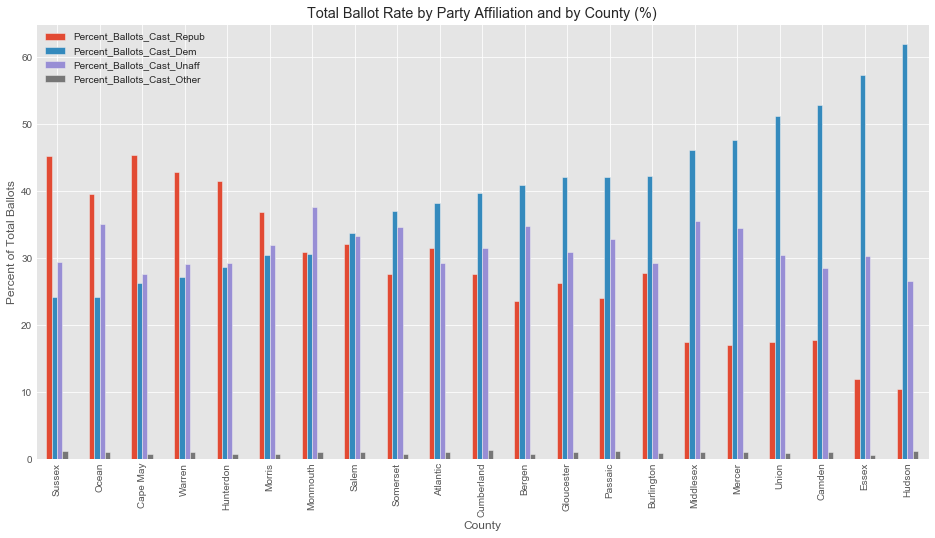

In [216]:
plotdata2 = county_df_party.sort_values(by='Percent_Ballots_Cast_Dem')
plt.style.use('ggplot')
plotdata2.plot(
x="ballot_county", y=['Percent_Ballots_Cast_Repub','Percent_Ballots_Cast_Dem',
                      'Percent_Ballots_Cast_Unaff','Percent_Ballots_Cast_Other'], kind="bar",figsize=(16,8))
    
plt.title("Total Ballot Rate by Party Affiliation and by County (%)")
plt.xlabel("County")
plt.ylabel("Percent of Total Ballots")

plt.show()

In [217]:
#Number of rejections per county /  total number of rejections in this party
# party_county['Dem_per_totalDemRej']=(party_county['Democratic']/party_county['Democratic'].sum()*100).round(1)
# party_county['Rep_per_totalRepRej']=(party_county['Republican']/party_county['Republican'].sum()*100).round(1)
# party_county['Other_per_totalOtherRej']=(party_county['Other']/party_county['Other'].sum()*100).round(1)
# party_county['Unaff_per_totalUnaffRej']=(party_county['Unaffiliated']/party_county['Unaffiliated'].sum()*100).round(1)
# party_county

In [9]:
party_df=pd.DataFrame(clean_VBM.groupby(['ballot_vtr_party','received_rejReason'])['voter_id'].size()).reset_index()
party_df.columns = ['ballot_vtr_party','rejReason','rejCount']#.argmax()
party_df.groupby('ballot_vtr_party')['rejCount'].sum().sort_values(ascending=False)


ballot_vtr_party
Unaffiliated               19360
Democratic                 17823
Republican                  8841
U.S. Constitution Party      222
Conservative Party           208
Libertarian                  203
Green Party                  119
Socialist Party               94
Natural Law Party             89
Reform Party                  29
Name: rejCount, dtype: int64

In [10]:
clean_VBM.ballot_vtr_party.value_counts()

Democratic                 1796391
Unaffiliated               1414728
Republican                 1120389
Libertarian                  10428
Conservative Party            8367
U.S. Constitution Party       7608
Green Party                   5732
Socialist Party               3136
Natural Law Party             2842
Reform Party                   857
Name: ballot_vtr_party, dtype: int64

In [76]:
a=pd.DataFrame(party_df.groupby('ballot_vtr_party')['rejCount'].sum()/clean_VBM.ballot_vtr_party.value_counts()*100).round(2)
a=a.reset_index().sort_values(by=0, ascending = False)
a.columns = ['Party','Rejection Count']
a

,Party,Rejection Count
5,Reform Party,3.38
4,Natural Law Party,3.14
7,Socialist Party,3.00
8,U.S. Constitution Party,2.92
0,Conservative Party,2.49
2,Green Party,2.08
3,Libertarian,1.95
9,Unaffiliated,1.37
1,Democratic,0.99
6,Republican,0.79


Text(0.5, 1.0, 'Percent of Rejection per Party')

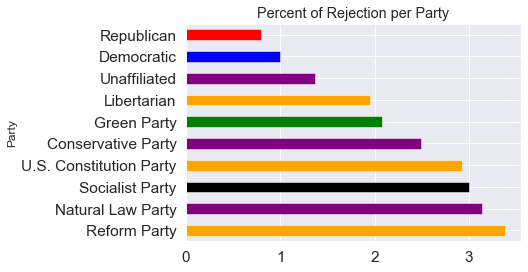

In [151]:
#Plotting rejections per parties
import matplotlib.pyplot as plt
a.plot(y= 'Rejection Count', x = 'Party',
kind="barh", color=['orange', 'purple', 'black','orange', 'purple','green','orange', 'purple','blue','red'],\
       legend=False)
plt.title('Percent of Rejection per Party')

In [137]:
clean_VBM = pd.read_csv('../../CorruptVBM_Rejection_Factors/Khamanna/clean_VBM.csv', low_memory=False)

In [138]:
clean_VBM.received_rejReason=clean_VBM.received_rejReason.fillna(0)
# clean_VBM['rejected_accepted'] = clean_VBM['received_rejReason'].apply(lambda x: 1 if x != 0 else x)
# clean_VBM['rejected_accepted'].unique()

In [139]:
clean_VBM['rejected_accepted'] = clean_VBM['received_rejReason'].apply(lambda x: 1 if x != 0 else x)
clean_VBM['rejected_accepted'].unique()

array([0, 1])

In [141]:
clean_VBM.columns

Index(['voter_id', 'ballot_county', 'ballot_vtr_party', 'ballot_receivedDate',
       'ballot_status', 'received_rejReason', 'rejected_accepted'],
      dtype='object')

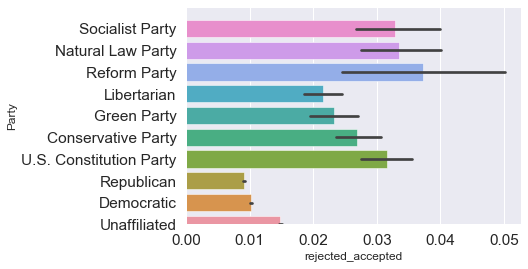

In [153]:
#Plotting rejections per parties with the account for sd (95) - black ticks
sns.barplot(y="ballot_vtr_party", x="rejected_accepted", data=clean_VBM)
plt.ylim(0, 10)
plt.ylabel("Party")
plt.show()

In [99]:
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
party_df.ballot_vtr_party = party_df.ballot_vtr_party.apply(lambda x: 'Other' if x in Other else x)
party_df

,ballot_vtr_party,rejReason,rejCount
0,Other,Ballot Not Enclosed,7
1,Other,Ballot Received After Deadline,11
2,Other,Bearer Exceeded Limit,1
3,Other,Certificate Missing,46
4,Other,Certificate Not Signed,38
...,...,...,...
96,Unaffiliated,Other,2600
97,Unaffiliated,Power of Attorney,7
98,Unaffiliated,Primary-Voted Both Parties,1
99,Unaffiliated,Signature Does Not Match,6745


In [100]:
clean_VBM_party = clean_VBM.copy()
Other = ['Conservative Party', 'Green Party','Libertarian','Natural Law Party',\
                                            'Reform Party','Socialist Party',\
                                            'U.S. Constitution Party']
clean_VBM_party.ballot_vtr_party = clean_VBM_party.ballot_vtr_party.apply(lambda x: 'Other' if x in Other else x)
clean_VBM

,voter_id,ballot_county,ballot_vtr_party,ballot_receivedDate,ballot_status,received_rejReason
0,P2763351335,Atlantic,Unaffiliated,10/23/2020,Accepted,NaN
1,P3919851339,Atlantic,Democratic,10/21/2020,Accepted,NaN
2,P6095651352,Atlantic,Republican,10/18/2020,Accepted,NaN
3,A1425851358,Atlantic,Democratic,NaN,Accepted,NaN
4,A1783751359,Atlantic,Democratic,NaN,Accepted,NaN
...,...,...,...,...,...,...
4368331,B6174726327,Warren,Unaffiliated,11/04/2020,Accepted,NaN
4368332,L1061243339,Warren,Democratic,11/03/2020,Accepted,NaN
4368333,C2754450078,Warren,Unaffiliated,10/28/2020,Accepted,NaN
4368334,H4507252594,Warren,Unaffiliated,10/27/2020,Accepted,NaN


In [101]:
#The ratio of rejections per party
party_df_percent=(((party_df.groupby('ballot_vtr_party')['rejCount'].sum().sort_values(ascending=False)/clean_VBM_party.ballot_vtr_party\
  .value_counts())*100).round(1)).reset_index()
party_df_percent.columns=['Party','Party_Affiliation%']
party_df_percent

,Party,Party_Affiliation%
0,Democratic,1.0
1,Other,2.5
2,Republican,0.8
3,Unaffiliated,1.4


In [111]:
party_df_percent = party_df_percent.groupby('Party',as_index=False)['Party_Affiliation%'].sum()\
.sort_values(by="Party_Affiliation%",ascending=False)
party_df_percent

,Party,Party_Affiliation%
1,Other,2.5
3,Unaffiliated,1.4
0,Democratic,1.0
2,Republican,0.8


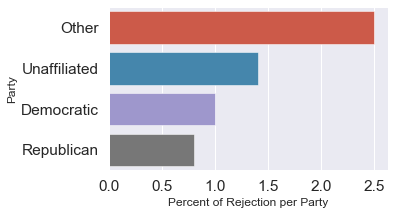

In [112]:
#Plotting rejections per parties after combining them as Other and coloring Dems in Blue and Republicans in Red

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(5,3))
sns.barplot(y='Party', x='Party_Affiliation%', data=party_df_percent, ax = ax)
plot_var = ax.set(ylabel='Party', xlabel='Percent of Rejection per Party')
#plotdata['party_df_percent'].plot(kind="barh", color=['black', 'red', 'black', 'red', 'black'])

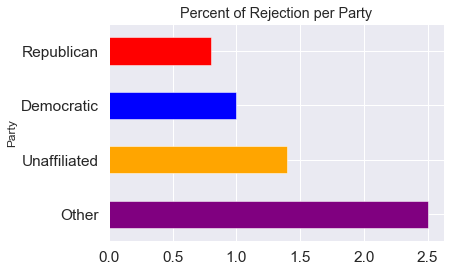

In [150]:
#Plotting rejections per parties after combining them as Other and coloring Dems in Blue and Republicans in Red
import matplotlib.pyplot as plt

party_df_percent.plot(y= 'Party_Affiliation%', x = 'Party',
kind="barh", color=[ 'purple', 'orange','blue','red'],\
       legend=False)
plt.title('Percent of Rejection per Party')


plt.show()

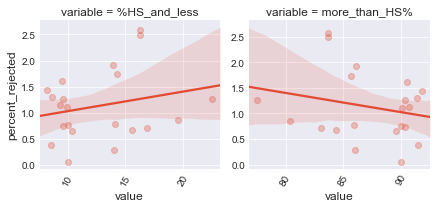

In [403]:
# Scatter plots of EDUCATION columns against percent_rejected
f = pd.melt(merged_df1, id_vars=['percent_rejected'], value_vars=sorted(['%HS_and_less','more_than_HS%']))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'percent_rejected', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

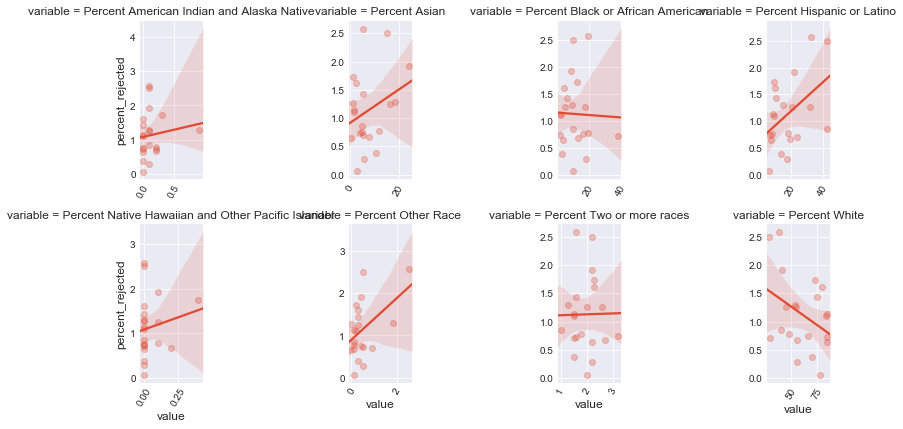

In [404]:
# Scatter plots of RACE features against percent_rejected
f = pd.melt(merged_df1, id_vars=['percent_rejected'], value_vars=sorted(['Percent Hispanic or Latino',\
                                                                        'Percent White',\
                                                                        'Percent Black or African American',\
                                                                        'Percent American Indian and Alaska Native',\
                                                                        'Percent Asian',\
                                                                        'Percent Native Hawaiian and Other Pacific Islander',\
                                                                        'Percent Other Race','Percent Two or more races']))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'percent_rejected', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

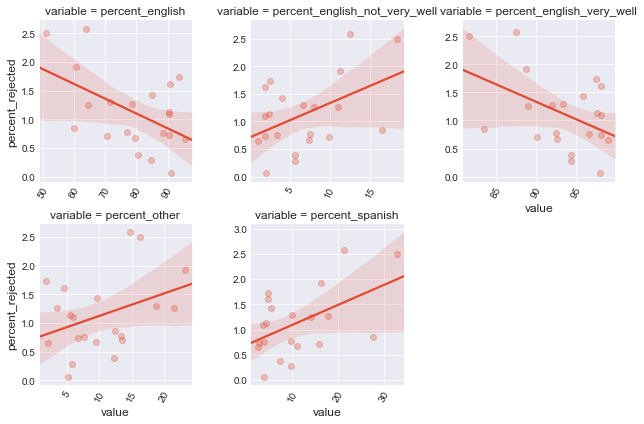

In [405]:
# Scatter plots of LANGUAGE columns against percent_rejected
f = pd.melt(merged_df1, id_vars=['percent_rejected'], value_vars=sorted(['percent_english',
                                                                        'percent_spanish',
                                                                        'percent_other',
                                                                        'percent_english_very_well',
                                                                        'percent_english_not_very_well']))
g = sns.FacetGrid(f, col='variable', col_wrap=3, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'percent_rejected', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

### Merging the demographic info with the clean_VBM dataset

In [22]:
import pandas as pd
merged_df1 = pd.read_csv('../../CorruptVBM_Rejection_Factors/Final Code/merged_df.csv', low_memory=False)

In [129]:
clean_VBM = pd.read_csv('../../CorruptVBM_Rejection_Factors/Khamanna/clean_VBM.csv', low_memory=False)

In [24]:
#Adding "County" for the names of demographic columns
merged_df1.columns = list(map(lambda x: 'County ' + x if x != 'County' else 'County ' + x, merged_df1.columns))

In [25]:
#merged_df1=merged_df1.drop(['County Unnamed: 0'],axis=1)
merged_df1=merged_df1.rename(columns = {'County County':'ballot_county'})

#### Merging clean_VBM and merged_df1

In [26]:
VBM_demographics = pd.merge(clean_VBM, merged_df1, left_on = 'ballot_county', right_on = 'ballot_county', how='outer')

In [27]:
#VBM_demographics.to_csv('VBM_demographics.csv') 

### trying the logistic regression

#### checking for multicollinearity first

In [28]:
VBM_demographics = pd.read_csv('../../CorruptVBM_Rejection_Factors/Khamanna/VBM_demographics.csv', low_memory=False)

In [29]:
corr_matrix =  VBM_demographics[['County Percent White','County Percent Hispanic or Latino',
       'County Percent Black or African American',
       'County Percent American Indian and Alaska Native',
       'County Percent Asian',
       'County Percent Native Hawaiian and Other Pacific Islander',
       'County Percent Other Race', 'County percent_english','County percent_spanish',
       'County percent_other','County %HS_and_less','County more_than_HS%']].corr(method="pearson") 

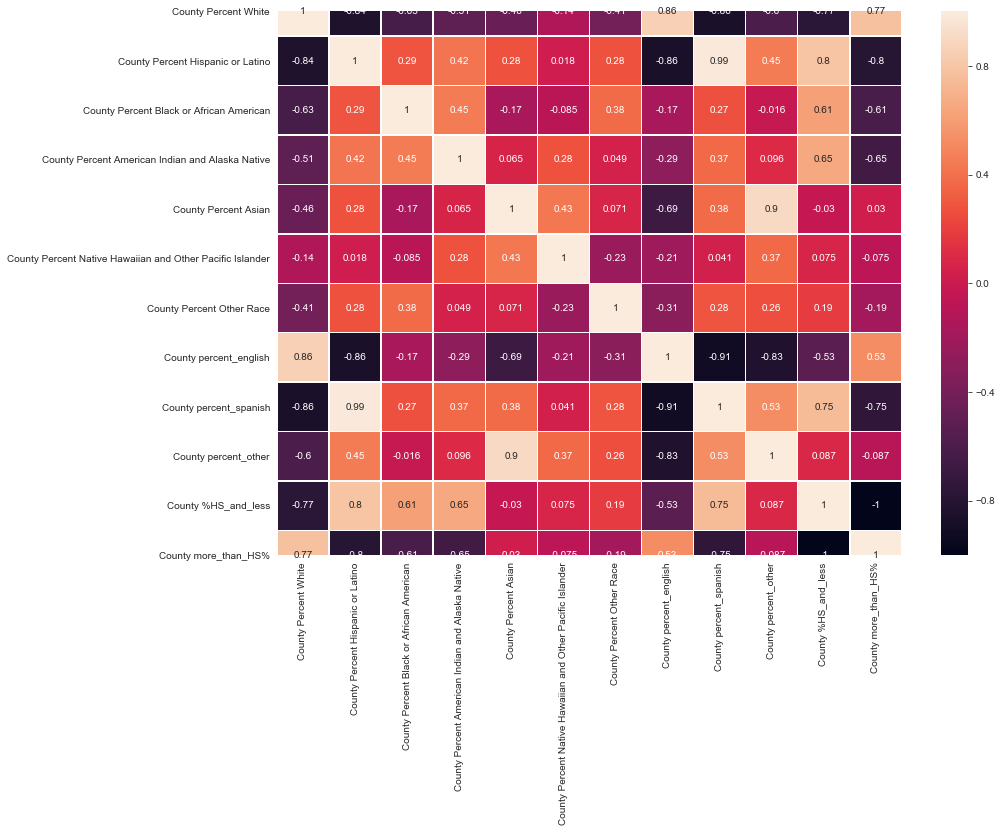

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.5, annot=True)

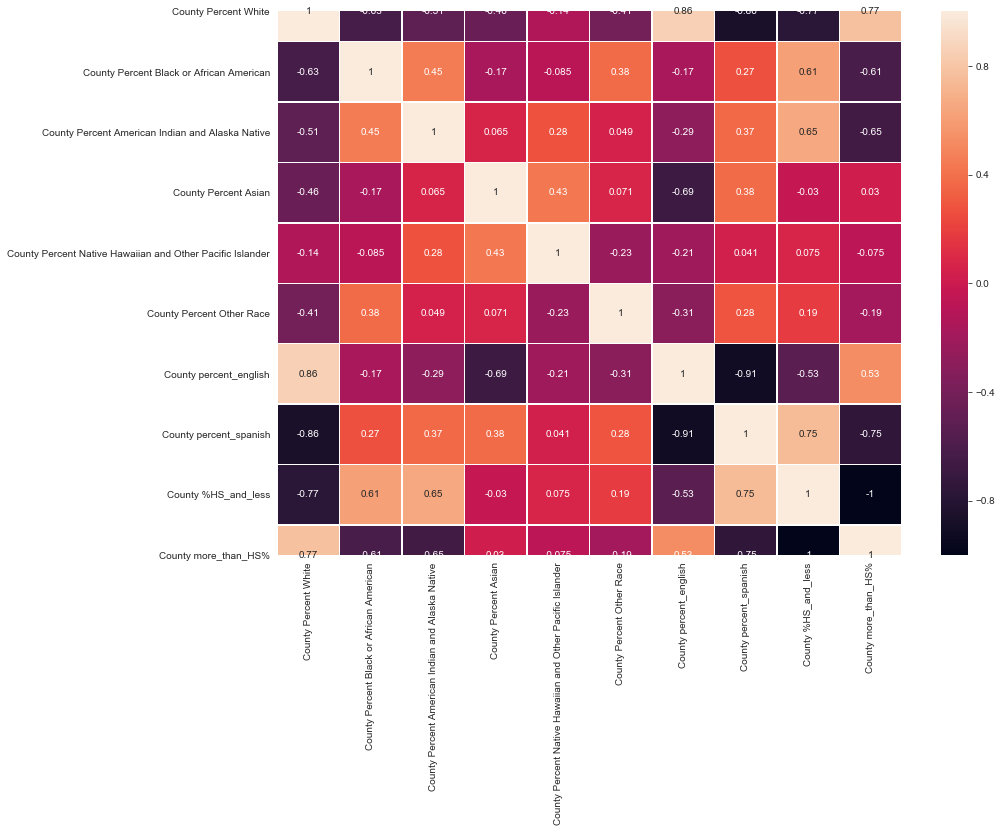

In [31]:
#Removed "County Percent Other" and "'County Percent Hispanic or Latino'"
corr_matrix =  VBM_demographics[['County Percent White',
       'County Percent Black or African American',
       'County Percent American Indian and Alaska Native',
       'County Percent Asian',
       'County Percent Native Hawaiian and Other Pacific Islander',
       'County Percent Other Race', 'County percent_english','County percent_spanish',
       'County %HS_and_less','County more_than_HS%']].corr(method="pearson") 
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, linewidths=.5, annot=True)

In [159]:
VBM_demographics.drop(['Unnamed: 0','ballot_receivedDate','County percent_rejected','County Percent_Ballots_Cast_Dem','voter_id'], axis=1)

,ballot_county,ballot_vtr_party,ballot_status,received_rejReason,County ballots_cast,County ballots_rejected,County Percent_Ballots_Cast_Repub,County Percent_Ballots_Cast_Unaff,County Percent_Ballots_Cast_Other,County Dem_Ballots_Cast,...,County percent_english,County percent_spanish,County percent_other,County percent_english_very_well,County percent_english_not_very_well,County median_earnings,County HS_and_less,County more_than_HS,County %HS_and_less,County more_than_HS%
0,Atlantic,Unaffiliated,Accepted,0,135484,910,31.508518,29.313424,1.006761,51716,...,79.4,11.1,9.5,92.6,7.4,45935,32464,175711,15.6,84.4
1,Atlantic,Democratic,Accepted,0,135484,910,31.508518,29.313424,1.006761,51716,...,79.4,11.1,9.5,92.6,7.4,45935,32464,175711,15.6,84.4
2,Atlantic,Republican,Accepted,0,135484,910,31.508518,29.313424,1.006761,51716,...,79.4,11.1,9.5,92.6,7.4,45935,32464,175711,15.6,84.4
3,Atlantic,Democratic,Accepted,0,135484,910,31.508518,29.313424,1.006761,51716,...,79.4,11.1,9.5,92.6,7.4,45935,32464,175711,15.6,84.4
4,Atlantic,Democratic,Accepted,0,135484,910,31.508518,29.313424,1.006761,51716,...,79.4,11.1,9.5,92.6,7.4,45935,32464,175711,15.6,84.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4368331,Warren,Unaffiliated,Accepted,0,60053,970,42.783874,29.157577,0.965814,16270,...,90.8,4.7,4.5,98.1,1.9,67667,8063,76852,9.5,90.5
4368332,Warren,Democratic,Accepted,0,60053,970,42.783874,29.157577,0.965814,16270,...,90.8,4.7,4.5,98.1,1.9,67667,8063,76852,9.5,90.5
4368333,Warren,Unaffiliated,Accepted,0,60053,970,42.783874,29.157577,0.965814,16270,...,90.8,4.7,4.5,98.1,1.9,67667,8063,76852,9.5,90.5
4368334,Warren,Unaffiliated,Accepted,0,60053,970,42.783874,29.157577,0.965814,16270,...,90.8,4.7,4.5,98.1,1.9,67667,8063,76852,9.5,90.5


In [33]:
#Filling the NaN's for the y_column - "received_rejReason"
VBM_demographics.received_rejReason=VBM_demographics.received_rejReason.fillna(0)

In [34]:
#Transforming the values into 0 and 1
VBM_demographics.received_rejReason = VBM_demographics.received_rejReason.apply(lambda x: 1 if x != 0 else x)

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [36]:
#getting dummies for ballot_county and voter party separately
U = pd.get_dummies(VBM_demographics['ballot_county'], prefix='county')
M = pd.get_dummies(VBM_demographics['ballot_vtr_party'], prefix='party')

In [37]:
#Concatting with 
VBM_dummified_counties = pd.concat((U.drop('county_Atlantic',axis=1),VBM_demographics[['County Percent White',
       'County Percent Black or African American',
       'County Percent American Indian and Alaska Native',
       'County Percent Asian',
       'County Percent Native Hawaiian and Other Pacific Islander',
       'County Percent Other Race', 'County percent_english','County percent_spanish',
       'County %HS_and_less','County more_than_HS%']]), axis=1)

In [38]:
VBM_dummified_parties = pd.concat((M.drop('party_Democratic',axis=1),VBM_demographics[['County Percent White',
       'County Percent Black or African American',
       'County Percent American Indian and Alaska Native',
       'County Percent Asian',
       'County Percent Native Hawaiian and Other Pacific Islander',
       'County Percent Other Race', 'County percent_english','County percent_spanish',
       'County %HS_and_less','County more_than_HS%']]), axis=1)

In [39]:
VBM_dummified_total= pd.concat((U.drop('county_Atlantic',axis=1),M.drop('party_Democratic',axis=1),\
                                VBM_demographics[['County Percent White',
       'County Percent Black or African American',
       'County Percent American Indian and Alaska Native',
       'County Percent Asian',
       'County Percent Native Hawaiian and Other Pacific Islander',
       'County Percent Other Race', 'County percent_english','County percent_spanish',
       'County %HS_and_less','County more_than_HS%']]), axis=1)

In [40]:

X=VBM_dummified_total
y=VBM_demographics.received_rejReason

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=0)
print(X.shape)
y.shape

(4368336, 39)


(4368336,)

In [42]:
#Logistic Regression

logistic = LogisticRegression(C=10000, solver='lbfgs',  class_weight='balanced')
logistic.fit(X_train, y_train)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000, class_weight='balanced')

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
predictions = logistic.predict(X_test)

In [45]:
confusion_matrix(y_test,predictions)

array([[867737, 427631],
       [  6652,   8481]])

In [46]:
#True Negative + True Positive (0=Accepted, 1-Rejected)
#867737 - predicting corretly 0 which is Accepted Ballots
#8481 - predicting correctly 1 which is Rejected Ballots
867737+8481

876218

In [47]:
#False Negative + False Positive (0=Accepted, 1-Rejected)
#427631 - predicting incorrectly 1 Rejected 
#6652 - predicting incorrectly 0 Accepted
427631+6652

434283

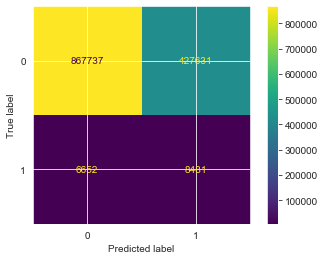

In [48]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logistic, X_test, y_test)  
plt.show() 

In [128]:
logistic.coef_

array([[-0.22124498,  0.12019728, -0.32543239, -0.00634884,  0.10062056,
        -0.02636751, -0.39571982,  0.25077349, -0.04630709,  0.03035301,
         0.28258108,  0.49823131, -0.49435992,  0.18338349, -0.38604281,
         0.14811747, -0.07492161,  0.08499344,  0.17455232,  0.18523174,
         0.04129921,  0.02183112,  0.03431055,  0.01889124,  0.00745307,
        -0.08963918,  0.02532978,  0.04610566,  0.4943009 ,  0.0815406 ,
         0.0449989 ,  0.08937936,  0.03964712,  0.05197791,  0.36021651,
        -0.06412224,  0.0470978 ,  0.03543655, -0.02540765]])

In [129]:
X.columns

Index(['county_Bergen', 'county_Burlington', 'county_Camden',
       'county_Cape May', 'county_Cumberland', 'county_Essex',
       'county_Gloucester', 'county_Hudson', 'county_Hunterdon',
       'county_Mercer', 'county_Middlesex', 'county_Monmouth', 'county_Morris',
       'county_Ocean', 'county_Passaic', 'county_Salem', 'county_Somerset',
       'county_Sussex', 'county_Union', 'county_Warren',
       'party_Conservative Party', 'party_Green Party', 'party_Libertarian',
       'party_Natural Law Party', 'party_Reform Party', 'party_Republican',
       'party_Socialist Party', 'party_U.S. Constitution Party',
       'party_Unaffiliated', 'County Percent White',
       'County Percent Black or African American',
       'County Percent American Indian and Alaska Native',
       'County Percent Asian',
       'County Percent Native Hawaiian and Other Pacific Islander',
       'County Percent Other Race', 'County percent_english',
       'County percent_spanish', 'County %HS_and_less',

In [130]:
#Analyzing feature importance by looking at the coefs-"Reform Party" and "Cape May" county have very low coefs
a = [-0.22124498,  0.12019728, -0.32543239, -0.00634884,  0.10062056,
        -0.02636751, -0.39571982,  0.25077349, -0.04630709,  0.03035301,
         0.28258108,  0.49823131, -0.49435992,  0.18338349, -0.38604281,
         0.14811747, -0.07492161,  0.08499344,  0.17455232,  0.18523174,
         0.04129921,  0.02183112,  0.03431055,  0.01889124,  0.00745307,
        -0.08963918,  0.02532978,  0.04610566,  0.4943009 ,  0.0815406 ,
         0.0449989 ,  0.08937936,  0.03964712,  0.05197791,  0.36021651,
        -0.06412224,  0.0470978 ,  0.03543655, -0.02540765]
pd.Series(a, index=X.columns)

county_Bergen                                               -0.221245
county_Burlington                                            0.120197
county_Camden                                               -0.325432
county_Cape May                                             -0.006349
county_Cumberland                                            0.100621
county_Essex                                                -0.026368
county_Gloucester                                           -0.395720
county_Hudson                                                0.250773
county_Hunterdon                                            -0.046307
county_Mercer                                                0.030353
county_Middlesex                                             0.282581
county_Monmouth                                              0.498231
county_Morris                                               -0.494360
county_Ocean                                                 0.183383
county_Passaic      

In [94]:
#Trying another model without those features:
VBM_dummified_total2= pd.concat((U.drop(['county_Atlantic','county_Cape May'],axis=1),M.drop('party_Reform Party', axis=1),\
                                VBM_demographics[['County Percent White',
       'County Percent Black or African American',
       'County Percent American Indian and Alaska Native',
       'County Percent Asian',
       'County Percent Native Hawaiian and Other Pacific Islander',
       'County Percent Other Race', 'County percent_english','County percent_spanish',
       'County %HS_and_less','County more_than_HS%']]), axis=1)


In [97]:
X2=VBM_dummified_total2
y2=VBM_demographics.received_rejReason

In [98]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size = 0.30, random_state=0)
print(X2.shape)
y2.shape

(4368336, 38)


(4368336,)

In [99]:
logistic = LogisticRegression(C=10000, solver='lbfgs',  class_weight='balanced')
logistic.fit(X2_train, y2_train)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=10000, class_weight='balanced')

In [101]:
predictions2 = logistic.predict(X2_test)

In [102]:
confusion_matrix(y2_test,predictions2)

array([[826772, 468596],
       [  6186,   8947]])

In [ ]:
#Compared to what we had (array([[867737, 427631],[  6652,   8481]])) the new result doesn't look much better

### trying GridSearchCV with the very first set - parties, counties and demographics (minus multicollinear features)

In [133]:
#Logistic Regression with a gridsearch and CV
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

#creating a parameter grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l2'], 'class_weight':['balanced']}

gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(X_train, y_train)

#best hyperparameters:
gridsearch.best_params_

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [134]:
gridsearch.best_score_

0.6302838446155532

In [230]:
#Logistic Regression with a gridsearch and CV
from sklearn.model_selection import GridSearchCV

clf = LogisticRegression()

#creating a parameter grid
parameter_grid = {'C': [0.01, 0.1, 10], 'penalty': ['l2'], 'class_weight':['balanced']}

gridsearch = GridSearchCV(clf, parameter_grid)
gridsearch.fit(X_test, y_test)

#best hyperparameters:
gridsearch.best_params_

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}

In [231]:
gridsearch.best_score_

0.6335279395550225

##### The score for the test is almost the same as for the train set which means that the model is not overfitting!!

In [ ]:
#AUC for each model 
#compute the acuracy for testing as well - see if it's the same and not overfitting

### Trying Logistic Regression with the same set and C selected by the grid search:

In [135]:

logistic = LogisticRegression(C=1, solver='lbfgs',  class_weight='balanced')
logistic.fit(X_train, y_train)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1, class_weight='balanced')

In [136]:
predictions = logistic.predict(X_test)

In [137]:
#The results are not much better:
confusion_matrix(y_test,predictions)

array([[799055, 496313],
       [  5734,   9399]])

#### Feeding in only party and county data (dummifying and feeding in)

In [157]:
#getting dummies for ballot_county and voter party separately
A = pd.get_dummies(clean_VBM['ballot_county'], prefix='county')
Z = pd.get_dummies(clean_VBM['ballot_vtr_party'], prefix='party')

In [158]:
cleanVBM_Counties_Parties_only= pd.concat((A.drop('county_Atlantic',axis=1),\
                                                Z.drop('party_Democratic',axis=1)), axis=1)

In [159]:
X1=cleanVBM_Counties_Parties_only
y1=VBM_demographics.received_rejReason

In [160]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.30, random_state=0)
print(X1.shape)
y1.shape

(4368336, 29)


(4368336,)

In [161]:
#Logistic Regression

logistic1 = LogisticRegression(C=10000, solver='lbfgs', class_weight='balanced')
logistic1.fit(X1_train, y1_train)

LogisticRegression(C=10000, class_weight='balanced')

In [162]:
predictions1 = logistic1.predict(X1_test)

In [163]:
confusion_matrix(y1_test,predictions1)

array([[793013, 502355],
       [  5514,   9619]])

In [167]:
# True Negative + True Positive (0=Accepted, 1=Rejected)
# 793013 - predicting correctly 0 which is Acccepted Ballots
# 9619 - predicting correctly 1 which is Rejected Ballots
793013+9619

802632

In [ ]:
# False Negative + False Positive (0=Accepted, 1=Rejected)
# 502355 predicting incorrectly 0 which is Accepted Ballots
# 5514predicting incorrectly 1 which is Rejected Ballots
502355+5514

#### Trying logistic regression without counties

In [238]:
X3=VBM_dummified_parties
y=VBM_demographics.received_rejReason

In [239]:
X3_train,X3_test,y_train,y_test = train_test_split(X3,y,test_size = 0.30, random_state=0)
print(X3.shape)
y.shape

(4368336, 19)


(4368336,)

In [240]:
logistic = LogisticRegression(C=0.1, solver='lbfgs',  class_weight='balanced')
logistic.fit(X3_train, y_train)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=0.1, class_weight='balanced')

In [241]:
predictions3 = logistic.predict(X3_test)

In [242]:
confusion_matrix(y_test,predictions3)

array([[717928, 577440],
       [  5622,   9511]])

### Precision-Recall test

In [250]:
from sklearn import svm, datasets

classifier = svm.LinearSVC(class_weight='balanced', random_state=0)
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [251]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.02


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.02')

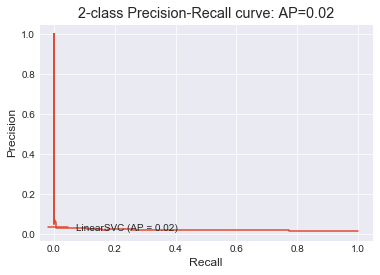

In [252]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Our AP result is very sad

### Calculate AUC and plot it

In [270]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
X=VBM_dummified_total
y=VBM_demographics.received_rejReason
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs', class_weight = 'balanced')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

/Users/ki/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.664


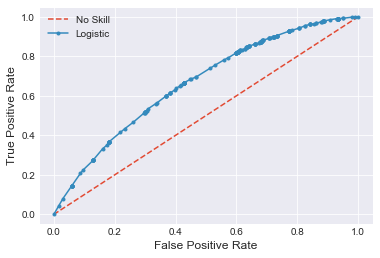

In [271]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()